# The story of a frustrating realization


### Hello! My name is Yvan David Hernandez and I'm a student (undergraduate) participating in this challenge in the context of a graduate class. As I'm in finals, the lack of sleep, the stress and the obvious fact that this is at a level where I doubt my input will count a lot, you can assume I'll go for the composition component. 

#### I hope you enjoy the story

In [208]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

It all started a rainy night in Bogota (Colombia). The cold, wet wind blows on the top floor of one downtown building. The big night moths go around one of the last windows with light. Behind the window inside the room is Code. Code is a group of data scientists who I won't give neither names nor gendres. We shall call them 1, 2, 3 and 4. They started to work on the survey results that Kaggle realized in 2018. 

In [209]:
data = pd.read_csv('multipleChoiceResponses.csv')

In [210]:
data.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


After visualizing the data frame, 3 and 4 expressed their excitment while looking at the head. <br>
"We will have to change a lot about this data frame if we want to be able to go deep inside" said 2. <br> 
While everybody was waiting for a dumb comment from 1, 4 started to think what should be taken out to be able to work. <br>
"Let's start" he said, "by taking away the time of completion, and let's work only on the multiple choice answers. For sure there's a lot in there."

In [153]:
data = data.drop(data.index[0])
data = data.drop(data.columns[0], axis=1)
data.head()

,Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,0,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,-1,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,-1,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,-1,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,-1,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


"By looking at the data we have to take in count that there is going to be open text answers" said 1, at everyones surprises. <br>
"Ok", said 4, "let's take them down with a loop". <br>
"We could do it through the heading of the columns" said 3, "like this!"

In [219]:
titulos =data.columns.values
#data.loc[:,'Q1_Male'].isna().any()==True
#print(data.loc[:,'Q47_Part_12'])

In [220]:
for i in range(len(titulos)):
    string = titulos[i]
    l = string[-1]
    if (l!='1' and l!='2' and l!='3' and l!='4' and l!='5' and l!='6' and l!='7' and l!='8' and l!='9' and l!='0'):
        data = data.drop(string, axis=1)
        continue
    #elif(data.loc[:,string].isna().any() == True):
    #    print(string)
    #    data = data.drop(string,axis=1)
    else:
        dummies = pd.get_dummies(data[string], prefix=string)
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(string, axis=1)

"Well done!!" they all cheered
![Cheersurl](https://media.giphy.com/media/BQAk13taTaKYw/giphy.gif)
"This for sure worked" said 4. "Let's check it out!"

In [221]:
data.head()

,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q1_What is your gender? - Selected Choice,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,...,Q50_Part_4_Afraid that others will use my work without giving proper credit,Q50_Part_4_What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Afraid that others will use my work without giving proper credit,Q50_Part_5_Not enough incentives to share my work,Q50_Part_5_What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Not enough incentives to share my work,Q50_Part_6_I had never considered making my work easier for others to reproduce,Q50_Part_6_What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - I had never considered making my work easier for others to reproduce,Q50_Part_7_None of these reasons apply to me,Q50_Part_7_What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - None of these reasons apply to me,Q50_Part_8_Other,Q50_Part_8_What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Other
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


"Nice work 3!" said 4, "Now we can work it by doing a PCA" <br>
"But we should try to clusted it no?" said 1 <br>
"If you want, go for it! What do you think 2?" answered 4.<br>
"I'll work with 1 into the clustering" responded 2.

### a) PCA

3 and 4 started working but didn't do much until 3 mentioned Wiltmore's book called 'Introduction to Scientific and Techincal Computing' (2017) and more specifically it's tenth chapter. After reading it they started to doing it right.

In [222]:
features = np.shape(data)[1]
#Matriz de covarianza (esta sección se inspiró mucho de la solución del ejercicio 24 de Nathalia Cardona
#https://github.com/ComputoCienciasUniandes/MetodosComputacionalesAvanzados/blob/master/soluciones/NathaliaCardona_ejercicio24.ipynb)
cov_matrix = np.array(data.cov())
#Autovalores y autovectores
val, vec = np.linalg.eig(cov_matrix)

In [223]:
#Ordena vec y val de mayor a menor
vec = vec[:,val.argsort()[::-1]]
val = val[val.argsort()[::-1]]

In [224]:
#Vectores, nuevo sistema coordenado
vec1 = vec[:,0]
vec2 = -vec[:,1]

In [225]:
#Varianza
var = np.sum(data.var())

In [226]:
#Varianza por componente
def var_comp(vec,data,comp):
    return np.sum(data.dot(vec[:,comp])**2)/len(data)

In [227]:
var_comps = []
for i in range(features):
    var_comps.append(var_comp(vec,data,i)/var)

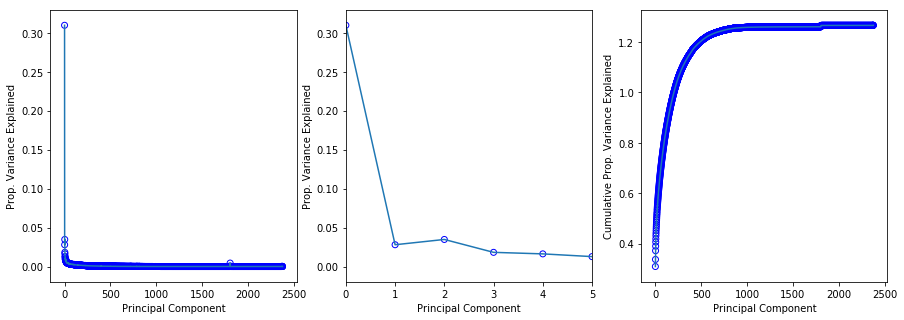

In [228]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
x = np.arange(features)
plt.plot(x,var_comps)
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.scatter(x,var_comps,facecolors="none",edgecolors='blue')

plt.subplot(1,3,2)
x = np.arange(features)
plt.plot(x,var_comps)
plt.xlim(0,5)
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.scatter(x,var_comps,facecolors="none",edgecolors='blue')


plt.subplot(1,3,3)
cum_var = np.cumsum(np.array(var_comps))
plt.plot(x,cum_var)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.scatter(x,cum_var,facecolors="none",edgecolors='blue')

After working so hard, 3 and 4 were disapointed at their results.![DisapointingUrl](https://media.giphy.com/media/14iZJ2agTAAb6w/giphy.gif) They didn't got a clear view of the components that the data was made of, and couldn't get any conclusion, except that the optimal K would be probably 2. They did a cluster of it.

In [252]:
cluster3 = KMeans(n_clusters=2, random_state=10)
cluster_labels3 = cluster3.fit_predict(data)
data['clusters'] = cluster_labels3

In [253]:
aplot=data[data.clusters==0].sum()[0:-2]
result = aplot.sort_values(ascending=False)
ma1= result[0:10]
print('We can construct the first cluster that assembels the folowing features')
print(ma1)
aplot1=data[data.clusters==1].sum()[0:-2]
result = aplot1.sort_values(ascending=False)
ma2= result[0:10]
print('We can construct visualize the 2nd cluster that assembels the folowing features')
print(ma2)

We can construct the first cluster that assembels the folowing features
Q1_Male                                             7565
Q4_Master’s degree                                  4030
Q5_Computer science (software engineering, etc.)    3986
Q4_Bachelor’s degree                                3144
Q18_Python                                          3104
Q16_Part_1_Python                                   3072
Q6_Student                                          2688
Q14_Part_10_None                                    2582
Q13_Part_1_Jupyter/IPython                          2466
Q8_0-1                                              2423
dtype: int64
We can construct visualize the 2nd cluster that assembels the folowing features
Q16_Part_1_Python             12639
Q1_Male                       11865
Q35_Part_6_0.0                11604
Q13_Part_1_Jupyter/IPython    11544
Q21_Part_2_Matplotlib         11325
Q18_Python                    11077
Q19_Part_1_Scikit-Learn       10668
Q41_Part_3_Ve

Even if it wasn't much, 3 and 4 could say with confidence that from the people that answers, so a fair trait of the computer scientists of the world are mostly males have a high education (mostly master's degree) and that they like and use Python with scikit-learn and Matplotlib. Nevertheless, when they turned to tell 1 and 2 about it, they found them play rock paper scissors lizard spock. In that very second, the classic joke came to 4's mind but didn't want to help the joke mood. ![xkcd](https://i.redd.it/5cjdqxcg07k11.png)

"Stop it" said 4 after the 3rd round of RPSLS. <br>
"But why?" <br>
"Because you aren't doing a thing! You're playing while we are working. Not cool" <br>
"But we are working! It's running, but taking sooooo long!" said 2 "Check it out!" <br>

## b) Clustering

In [ ]:
#The following code takes a very huge while to run. I higly descourage to run it! To make it more clear even, I'll comment it!

#range_n_clusters = np.arange(80,100)
#score = []
#for n_clusters in range_n_clusters:
#    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#    cluster_labels = clusterer.fit_predict(data)
#    silhouette_avg = silhouette_score(data, cluster_labels)
#    score.append(silhouette_avg)
#    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
#    
#plt.plot(range_n_clusters,score)
#plt.xlabel('K')
#plt.ylabel('silhouette score')

('For n_clusters =', 80, 'The average silhouette_score is :', -0.057214161693202946)
('For n_clusters =', 81, 'The average silhouette_score is :', -0.055780258021949893)
('For n_clusters =', 82, 'The average silhouette_score is :', -0.057544768067351072)
('For n_clusters =', 83, 'The average silhouette_score is :', -0.058861850121202298)
('For n_clusters =', 84, 'The average silhouette_score is :', -0.05930968617258206)
('For n_clusters =', 85, 'The average silhouette_score is :', -0.057119735705425945)
('For n_clusters =', 86, 'The average silhouette_score is :', -0.057890150542789474)
('For n_clusters =', 87, 'The average silhouette_score is :', -0.059931949263046097)
('For n_clusters =', 88, 'The average silhouette_score is :', -0.057302577437669824)
('For n_clusters =', 89, 'The average silhouette_score is :', -0.055365256535527901)
('For n_clusters =', 90, 'The average silhouette_score is :', -0.055882421109439827)
('For n_clusters =', 91, 'The average silhouette_score is :', -0.0

Oh no! 1 and 3 couldn't finish running the full silhouette scores because the power went down. Nonetheless they realize that even if they are all negatives, the $k=97$ clusters has the highest score. So they tried it!!

In [255]:
cluster2 = KMeans(n_clusters=97, random_state=10)
cluster_labels2 = cluster2.fit_predict(data)
data['clusters'] = cluster_labels2

In [256]:
aplot=data[data.clusters==0].sum()[0:-2]
result = aplot.sort_values(ascending=False)
ma1= result[0:10]
print('We can construct the first cluster that assembels the folowing features')
print(ma1)

aplot1=data[data.clusters==1].sum()[0:-2]
result = aplot1.sort_values(ascending=False)
ma2= result[0:10]
print('We can construct the cluster 2 that assembels the folowing features')
print(ma2)

aplot4=data[data.clusters==4].sum()[0:-2]
result4 = aplot4.sort_values(ascending=False)
ma4= result4[0:10]
print('We can construct the cluster 5 that assembels the folowing features')
print(ma4)

aplot5=data[data.clusters==5].sum()[0:-2]
result5 = aplot5.sort_values(ascending=False)
ma5= result5[0:10]
print('We can construct the cluster 6 that assembels the folowing features')
print(ma5)

aplot25=data[data.clusters==35].sum()[0:-2]
result25 = aplot25.sort_values(ascending=False)
ma25= result25[0:10]
print('We can construct the cluster 36 that assembels the folowing features')
print(ma25)

aplot65=data[data.clusters==65].sum()[0:-2]
result65 = aplot65.sort_values(ascending=False)
ma65= result65[0:10]
print('We can construct the cluster 66 that assembels the folowing features')
print(ma65)

aplot85=data[data.clusters==85].sum()[0:-2]
result85 = aplot85.sort_values(ascending=False)
ma85= result85[0:10]
print('We can construct the cluster 86 that assembels the folowing features')
print(ma85)


We can construct the first cluster that assembels the folowing features
Q16_Part_2_R                                      240
Q13_Part_2_RStudio                                232
Q35_Part_6_0.0                                    224
Q21_Part_1_ggplot2                                205
Q31_Part_6_Numerical Data                         192
Q15_Part_6_I have not used any cloud providers    185
Q35_Part_3_0.0                                    183
Q41_Part_2_Very important                         182
Q6_Student                                        169
Q1_Male                                           168
dtype: int64
We can construct the cluster 2 that assembels the folowing features
Q1_Male                                             762
Q4_Bachelor’s degree                                762
Q5_Computer science (software engineering, etc.)    367
Q2_22-24                                            263
Q3_India                                            235
Q7_Computers/Technology    

"From all of this info we can actually draw some conclusions on the comunity" said 3

## Conclusions

Code drew the folowing conclusions from the diferent procedures they did upon the data. <br>
The clustering in 2, made clear that there were two groups in the survey. The academics with bachelors, masters degree's in computer science that have been in data science for a small time (Question 8). And another larger group where these features are not dominant. Also, the male gender is very percistent and it's fair to asume a precense of female gender in both groups as there isn't a aglomeration of them. <br> The second group agrees in the priorities of education in ML (Question 41) as in the academia there isn't a clear component on the subject (they don't agree in those priorities).
This only shows what everybody already knows, there are data scientists in and out of academia, they are most of them big time fans of Python. Nonetheless, it's outstanding and ridiculous the poor proportion of females in both of these domains. 

From the small clusters, there can be numerous conclusions. Here we will state a few of what can be deduced of them. The first cluster aglomerates people that represent the link between R and data visualization to do buisness decisions, but these are a small portion of the survey. We acknowledge the big presence of both India (cluster 2) and China (cluster 5). All of these clusters reflect the lack of female presence. 

The final conclusion of this work is that even if the evolution and the dinamic of data science is clear, is terribly frustrating to see the poor porcentage of women and how even the comunity doesn't acknowledge (there is not one question about it). 